In [13]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sb
from collections import Counter

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
mh_df = pd.read_excel('C:\\Users\\Admin\\Documents\\GitHub\\US-Mental-Healthcare-Data-Analysis\\Gender Mental Healthcare.xlsx')

In [15]:
print(mh_df.head(3))

                                           Indicator   Group          State  \
0  Took Prescription Medication for Mental Health...  By Sex  United States   
1  Took Prescription Medication for Mental Health...  By Sex  United States   
2       Received Counseling or Therapy, Last 4 Weeks  By Sex  United States   

  Subgroup  Phase  Time Period      Time Period Label Time Period Start Date  \
0     Male    2.0           13  Aug 19 - Aug 31, 2020             08/19/2020   
1   Female    2.0           13  Aug 19 - Aug 31, 2020             08/19/2020   
2     Male    2.0           13  Aug 19 - Aug 31, 2020             08/19/2020   

  Time Period End Date  Value  LowCI  HighCI Confidence Interval  
0           08/31/2020   13.7   13.0    14.3         13.0 - 14.3  
1           08/31/2020   24.6   24.0    25.2         24.0 - 25.2  
2           08/31/2020    6.7    6.2     7.3           6.2 - 7.3  


In [16]:
#read headers
mh_df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval'],
      dtype='object')

In [17]:
#read column
print(mh_df[['Indicator','Group','State','Subgroup','Phase','Time Period','Time Period Label','Time Period Start Date','Time Period End Date','Value','LowCI','HighCI','Confidence Interval']])

                                             Indicator   Group          State  \
0    Took Prescription Medication for Mental Health...  By Sex  United States   
1    Took Prescription Medication for Mental Health...  By Sex  United States   
2         Received Counseling or Therapy, Last 4 Weeks  By Sex  United States   
3         Received Counseling or Therapy, Last 4 Weeks  By Sex  United States   
4    Took Prescription Medication for Mental Health...  By Sex  United States   
..                                                 ...     ...            ...   
299       Received Counseling or Therapy, Last 4 Weeks  By Sex  United States   
300  Took Prescription Medication for Mental Health...  By Sex  United States   
301  Took Prescription Medication for Mental Health...  By Sex  United States   
302  Needed Counseling or Therapy But Did Not Get I...  By Sex  United States   
303  Needed Counseling or Therapy But Did Not Get I...  By Sex  United States   

    Subgroup  Phase  Time P

In [18]:
#read specific location
print(mh_df.iloc[8,3])

Male


In [19]:
#describing data
mh_df.describe()
mh_df.sort_values('Value', ascending=False)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
293,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,44,"Mar 30 - Apr 11, 2022",03/30/2022,4/11/2022,33.8,32.9,34.7,32.9 - 34.7
301,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,33.1,32.1,34.1,32.1 - 34.1
237,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.2,39,"Sep 29 - Oct 11, 2021",09/29/2021,10/11/2021,32.6,31.5,33.7,31.5 - 33.7
261,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.3,41,"Dec 29, 2021 - Jan 10, 2022",12/29/2021,1/10/2022,32.5,31.5,33.4,31.5 - 33.4
269,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.3,42,"Jan 26 - Feb 7, 2022",01/26/2022,2/7/2022,32.3,31.7,33.0,31.7 - 33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,-1.0,1,"Feb 23 - Mar 1, 2022",02/23/2022,3/1/2022,NaN,NaN,NaN,NaN
280,Took Prescription Medication for Mental Health...,By Sex,United States,Male,-1.0,1,"Feb 23 - Mar 1, 2022",02/23/2022,3/1/2022,NaN,NaN,NaN,NaN
281,Took Prescription Medication for Mental Health...,By Sex,United States,Female,-1.0,1,"Feb 23 - Mar 1, 2022",02/23/2022,3/1/2022,NaN,NaN,NaN,NaN
284,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,-1.0,1,"Feb 23 - Mar 1, 2022",02/23/2022,3/1/2022,NaN,NaN,NaN,NaN


In [20]:
#filtering gender data
sexmhdf=mh_df.loc[(mh_df['Subgroup']=='Male')|(mh_df['Subgroup']=='Female')]
sexmhdf

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
0,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.7,13.0,14.3,13.0 - 14.3
1,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,24.6,24.0,25.2,24.0 - 25.2
2,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,6.7,6.2,7.3,6.2 - 7.3
3,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,10.6,10.1,11.2,10.1 - 11.2
4,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,16.3,15.6,17.1,15.6 - 17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,13.7,13.1,14.4,13.1 - 14.4
300,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,20.2,19.0,21.3,19.0 - 21.3
301,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,33.1,32.1,34.1,32.1 - 34.1
302,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,8.5,7.7,9.4,7.7 - 9.4


In [21]:
#checking null values
sexmhdf.isnull().head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#identify rows with null values
sexmhdf.isnull().sum()

Indicator                  0
Group                      0
State                      0
Subgroup                   0
Phase                      0
Time Period                0
Time Period Label          0
Time Period Start Date     0
Time Period End Date       0
Value                     40
LowCI                     40
HighCI                    40
Confidence Interval       40
dtype: int64

In [ ]:
#eliminate rows with null values
sexmhdf.dropna()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
8,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.7,13.0,14.3,13.0 - 14.3
9,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,24.6,24.0,25.2,24.0 - 25.2
80,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,6.7,6.2,7.3,6.2 - 7.3
81,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,10.6,10.1,11.2,10.1 - 11.2
152,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,16.3,15.6,17.1,15.6 - 17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,13.7,13.1,14.4,13.1 - 14.4
10252,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,20.2,19.0,21.3,19.0 - 21.3
10253,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,33.1,32.1,34.1,32.1 - 34.1
10332,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,8.5,7.7,9.4,7.7 - 9.4


In [ ]:
#change phase 3 (Oct 28 â€“ Dec 21) to 3
sexmhdf.loc[sexmhdf['Phase']== '3 (Oct 28 â€“ Dec 21)','Phase']= '3'
sexmhdf

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
8,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.7,13.0,14.3,13.0 - 14.3
9,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,24.6,24.0,25.2,24.0 - 25.2
80,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,6.7,6.2,7.3,6.2 - 7.3
81,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,10.6,10.1,11.2,10.1 - 11.2
152,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,16.3,15.6,17.1,15.6 - 17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,13.7,13.1,14.4,13.1 - 14.4
10252,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,20.2,19.0,21.3,19.0 - 21.3
10253,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,33.1,32.1,34.1,32.1 - 34.1
10332,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,8.5,7.7,9.4,7.7 - 9.4


In [ ]:
#change phase 3 (Oct 28 â€“ Dec 21) to 3 to 
sexmhdf.loc[sexmhdf['Phase']== '3 (Jan 6 â€“ Mar 29)','Phase']= '3'
sexmhdf

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
8,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.7,13.0,14.3,13.0 - 14.3
9,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,24.6,24.0,25.2,24.0 - 25.2
80,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,6.7,6.2,7.3,6.2 - 7.3
81,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,10.6,10.1,11.2,10.1 - 11.2
152,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,16.3,15.6,17.1,15.6 - 17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,13.7,13.1,14.4,13.1 - 14.4
10252,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,20.2,19.0,21.3,19.0 - 21.3
10253,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,33.1,32.1,34.1,32.1 - 34.1
10332,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,8.5,7.7,9.4,7.7 - 9.4


In [ ]:
#save gender data friend as a new dataset
sexmhdf.to_excel('Gender Mental Healthcare.xlsx', index=False)

In [ ]:
#count number of rows
len(sexmhdf.index)

304

In [ ]:
import re

In [ ]:
#filter individulas that need counseling or theraphy but did not get it
needcounselling=sexmhdf.loc[sexmhdf['Indicator'].str.contains('^Needed[a-z]*', flags=re.I, regex=True)]
needcounselling

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
224,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,6.8,6.2,7.3,6.2 - 7.3
225,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,11.4,10.9,11.9,10.9 - 11.9
512,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,09/14/2020,6.9,6.4,7.3,6.4 - 7.3
513,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Female,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,09/14/2020,12.3,11.7,12.8,11.7 - 12.8
800,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,2,15,"Sep 16 - Sep 28, 2020",09/16/2020,09/28/2020,7.7,7.1,8.3,7.1 - 8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Female,3.4,43,"Mar 2 - Mar 14, 2022",3/2/2022,03/14/2022,13.9,13.3,14.6,13.3 - 14.6
10012,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,44,"Mar 30 - Apr 11, 2022",03/30/2022,4/11/2022,8.7,8.0,9.6,8.0 - 9.6
10013,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Female,3.4,44,"Mar 30 - Apr 11, 2022",03/30/2022,4/11/2022,14.0,13.2,14.8,13.2 - 14.8
10332,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,8.5,7.7,9.4,7.7 - 9.4


In [ ]:
#count gender that needs counseling 
len(needcounselling.index)

76

In [ ]:
import re

In [ ]:
#output all rows with indicator Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy
action=sexmhdf.loc[sexmhdf['Indicator'].str.contains('^Took[a-z]*' or '^Recieved[a-z]*', flags=re.I, regex=True)]
action

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
8,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.7,13.0,14.3,13.0 - 14.3
9,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,24.6,24.0,25.2,24.0 - 25.2
152,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,16.3,15.6,17.1,15.6 - 17.1
153,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,28.0,27.3,28.7,27.3 - 28.7
296,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,14,"Sep 2 - Sep 14, 2020",9/2/2020,09/14/2020,14.8,14.2,15.5,14.2 - 15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,44,"Mar 30 - Apr 11, 2022",03/30/2022,4/11/2022,33.8,32.9,34.7,32.9 - 34.7
10092,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,17.1,16.0,18.2,16.0 - 18.2
10093,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,28.8,27.8,29.8,27.8 - 29.8
10252,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,20.2,19.0,21.3,19.0 - 21.3


In [ ]:
#count gender that takes action
len(action.index)

152

In [ ]:
#the highest average value of mental healthcare for what indicator?
sexmhdf.groupby(['Indicator']).mean().sort_values('Value', ascending=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_9536\3576275372.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sexmhdf.groupby(['Indicator']).mean().sort_values('Value', ascending=False)


,Time Period,Value,LowCI,HighCI
Indicator,,,,
"Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks",25.315789,24.592424,23.707576,25.484848
"Took Prescription Medication for Mental Health, Last 4 Weeks",25.315789,21.140909,20.304545,22.013636
"Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks",25.315789,10.824242,10.150000,11.518182
"Received Counseling or Therapy, Last 4 Weeks",25.315789,10.034848,9.416667,10.672727


In [ ]:
#check the highest and lowest day of mental healthcare supervision
sexmhdf.sort_values('Time Period', ascending=False)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval
10333,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,14.4,13.5,15.3,13.5 - 15.3
10332,Needed Counseling or Therapy But Did Not Get I...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,8.5,7.7,9.4,7.7 - 9.4
10253,Took Prescription Medication for Mental Health...,By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,33.1,32.1,34.1,32.1 - 34.1
10252,Took Prescription Medication for Mental Health...,By Sex,United States,Male,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,20.2,19.0,21.3,19.0 - 21.3
10173,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,5/9/2022,13.7,13.1,14.4,13.1 - 14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Male,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN
8388,"Received Counseling or Therapy, Last 4 Weeks",By Sex,United States,Female,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN
8490,Took Prescription Medication for Mental Health...,By Sex,United States,Male,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN
8491,Took Prescription Medication for Mental Health...,By Sex,United States,Female,-1,1,"Oct 12 - Nov 30, 2021",10/12/2021,11/30/2021,NaN,NaN,NaN,NaN


<Axes: ylabel='Subgroup'>

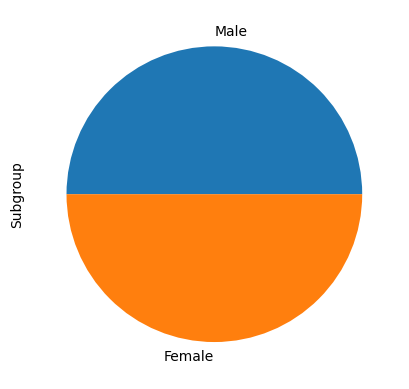

In [ ]:
#pie chart presenting male/female proportion
sexmhdf.Subgroup.value_counts().plot(kind='pie')

<Axes: xlabel='Time Period', ylabel='Value'>

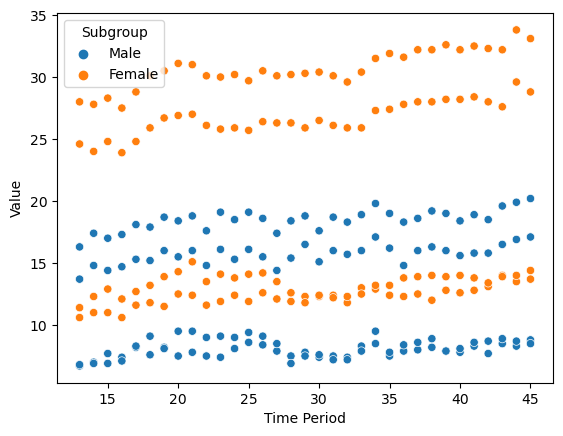

In [ ]:
#create a scatterplot with the values and Subgroup, differ the plot color by gender
sns.scatterplot(x='Time Period', y='Value', hue='Subgroup', data=sexmhdf)

In [ ]:
#total value of highCI 
sexmhdf.HighCI.sum()

4599.5

C:\Users\PC\AppData\Local\Temp\ipykernel_9536\3683641355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sexmhdf.HighCI)


<Axes: xlabel='HighCI', ylabel='Density'>

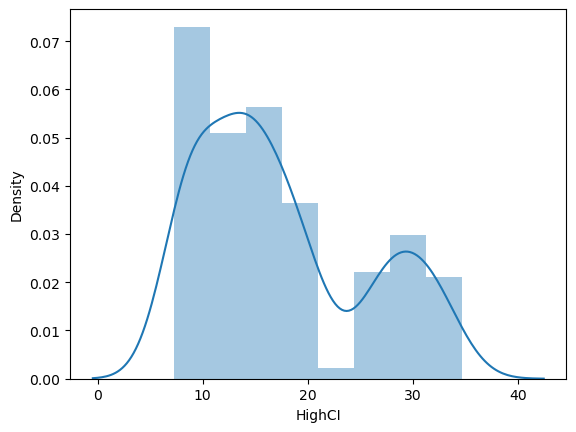

In [ ]:
#histogram with the HighCI- values
sns.distplot(sexmhdf.HighCI)

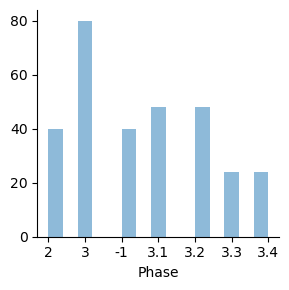

In [ ]:
g=sns.FacetGrid(sexmhdf)
g.map(plt.hist,'Phase', alpha=.5, bins=15)

In [ ]:
sexmhdf[["Indicator"]].groupby(['Indicator'],as_index=False).mean().sort_values(by='Indicator', ascending=False)

,Indicator
3,Took Prescription Medication for Mental Health...
2,Took Prescription Medication for Mental Health...
1,"Received Counseling or Therapy, Last 4 Weeks"
0,Needed Counseling or Therapy But Did Not Get I...


C:\Users\PC\AppData\Local\Temp\ipykernel_9536\1951825354.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(the_grid[0,0],aspect=1)


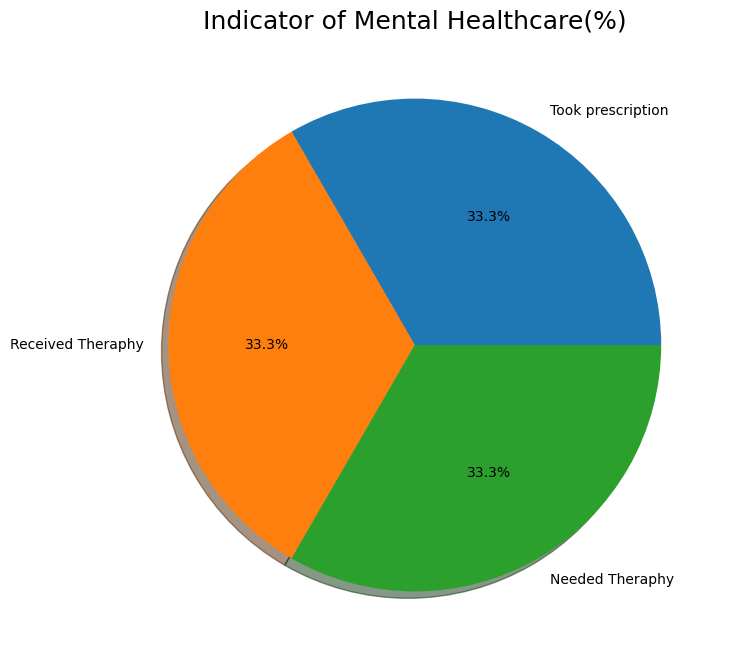

In [ ]:
#some data
fig,ax=plt.subplots(figsize=(10,8))
labels='Took prescription','Received Theraphy','Needed Theraphy'
fracs=[33,33,33]
explode=(1,1.05,1,1)
#make square figures an axes

the_grid=GridSpec(1,1)
plt.subplot(the_grid[0,0],aspect=1)
plt.pie(fracs,labels=labels,autopct='%1.1F%%',shadow=True)
plt.title('Indicator of Mental Healthcare(%)',fontsize=18)
plt.show()

Text(0.5, 1.0, 'Male vs Female')

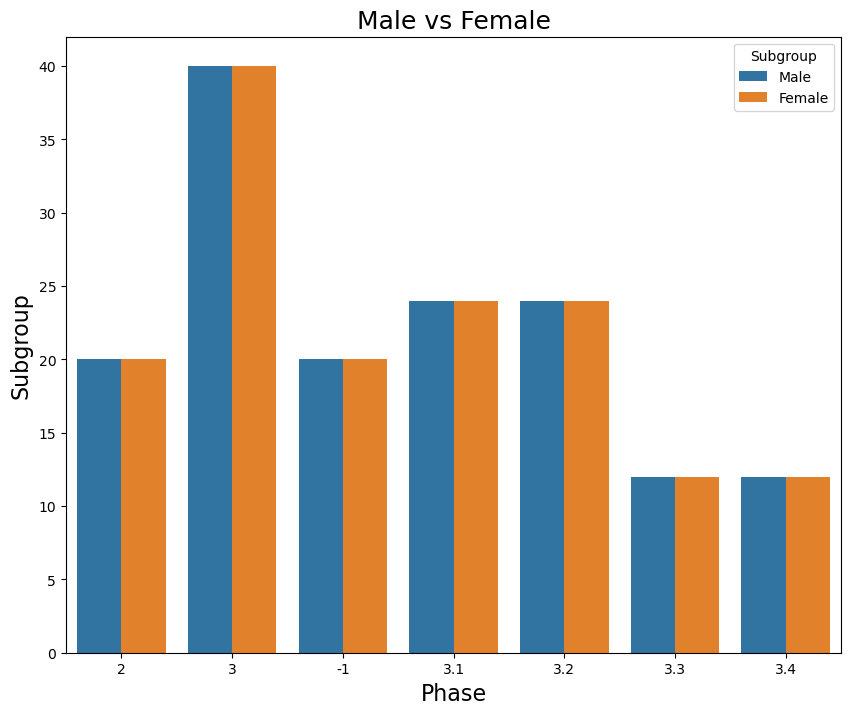

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=sexmhdf,x='Phase',hue='Subgroup', ax=ax)
plt.ylabel('Subgroup', fontsize=16)
plt.xlabel('Phase', fontsize=16)
plt.title('Male vs Female', fontsize=18)

C:\Users\PC\AppData\Local\Temp\ipykernel_9536\1020448464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sexmhdf.corr(), linewidth=0.5, annot=True)


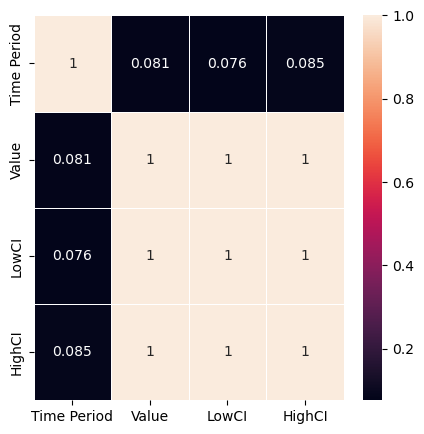

In [ ]:
plt.figure(figsize= (5,5))
sns.heatmap(sexmhdf.corr(), linewidth=0.5, annot=True)
plt.show()

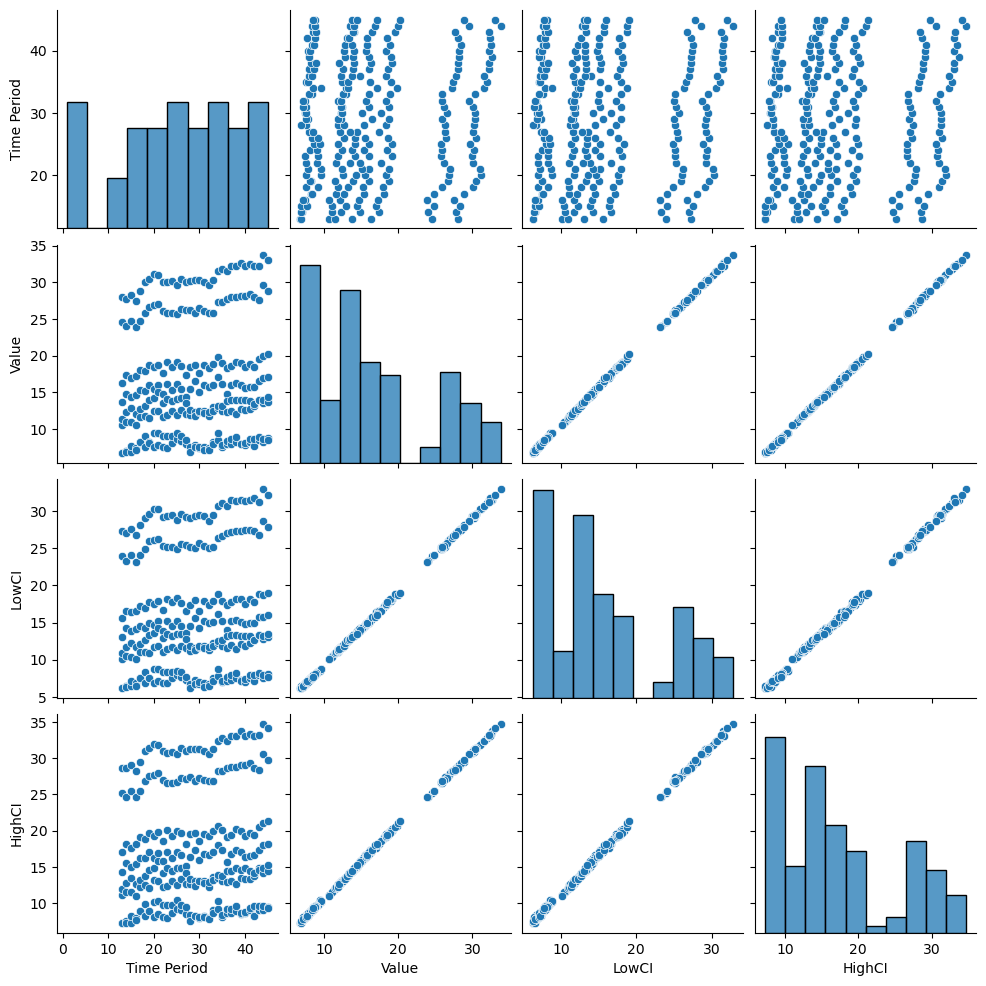

In [ ]:
sns.pairplot(sexmhdf)

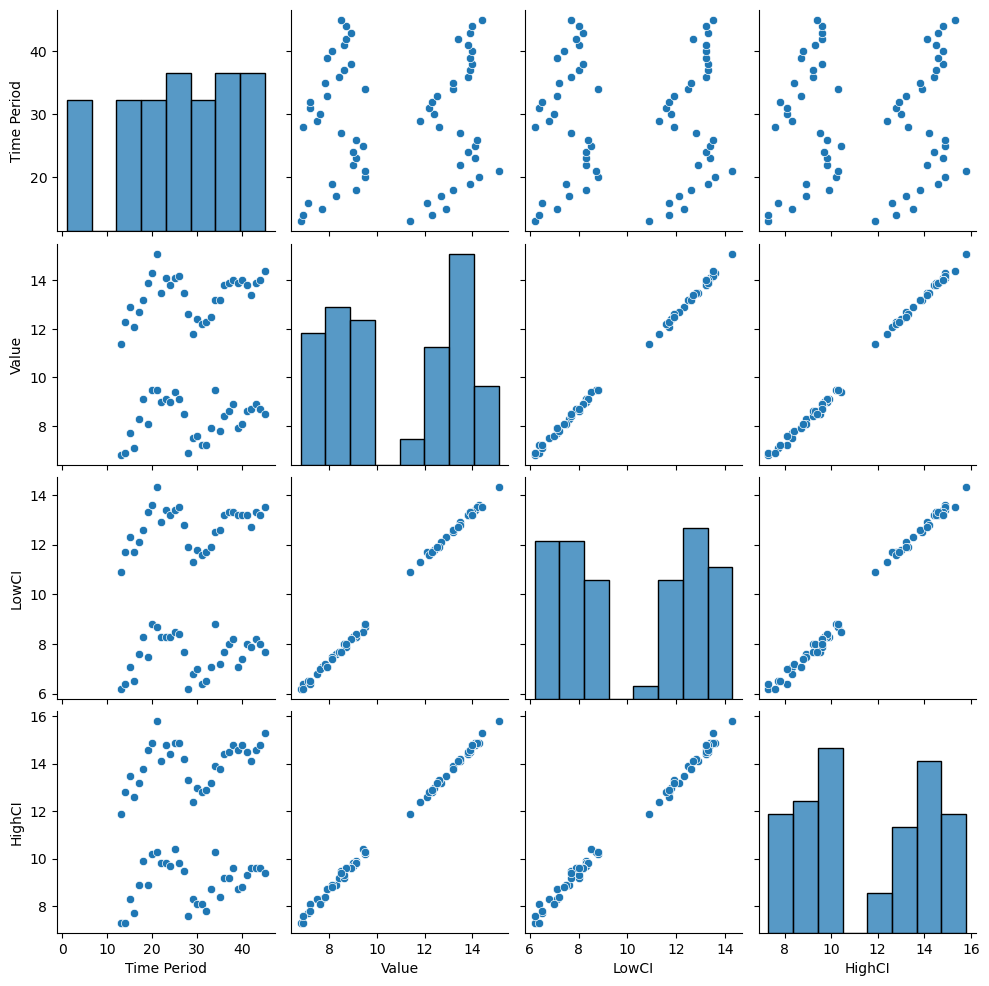

In [ ]:
sns.pairplot(needcounselling)

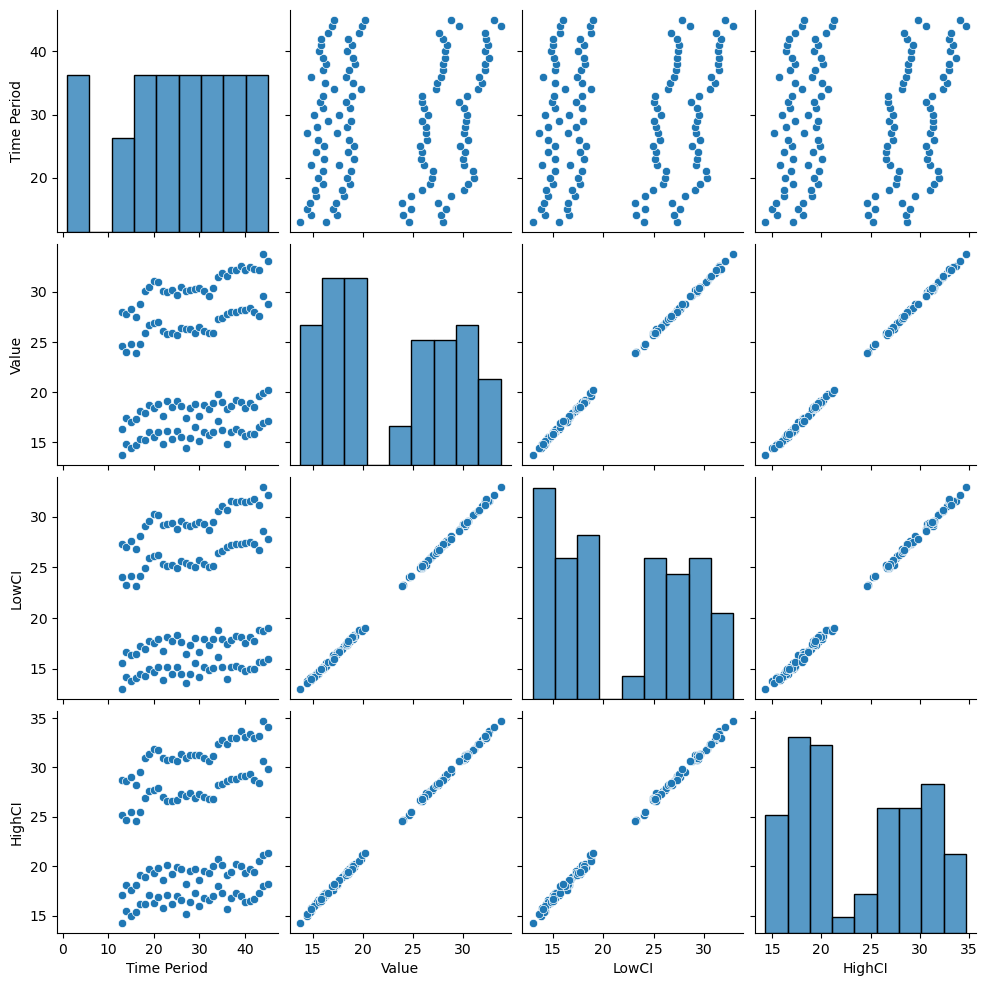

In [ ]:
sns.pairplot(action)